---

### Table of contents 

#### [Step 1. Download the data and prepare it for analysis](#1)  
#### [Step 2. Make reports and calculate metrics, advise how much money to invest and where](#2)  
#### [Step 3. Conclusion](#3)

<a id='1'> </a>

### Step 1. Download the data and prepare it for analysis

In [1]:
##  installing libraries
#!pip install matplotlib -U
#!pip install pandas -U
#!pip install numpy -U
#!pip install scipy -U
#!pip install plotly -U

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.3 MB 232 kB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.9 MB 2.8 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 15.3 MB 184 kB/s  eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 27.4 MB 54 kB/s  eta 0:00:01     |█████████████████▌              | 15.0 MB 2.7 MB/s eta 0:00:05
ERROR: tensorflow 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.6.2 which is incompatible.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████

In [2]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# importing datasets
visits_raw = pd.read_csv('/datasets/visits_log_us.csv')
orders_raw = pd.read_csv('/datasets/orders_log_us.csv')
costs_raw = pd.read_csv('/datasets/costs_us.csv')

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# general info about the data
visits_raw.head(5)

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [4]:
visits_raw.tail(5)

Device               End Ts  Source Id             Start Ts  \
359395  desktop  2017-07-29 19:07:19          2  2017-07-29 19:07:00   
359396    touch  2018-01-25 17:38:19          1  2018-01-25 17:38:00   
359397  desktop  2018-03-03 10:12:19          4  2018-03-03 10:12:00   
359398  desktop  2017-11-02 10:12:19          5  2017-11-02 10:12:00   
359399    touch  2017-09-10 13:13:19          2  2017-09-10 13:13:00   

                         Uid  
359395  18363291481961487539  
359396  18370831553019119586  
359397  18387297585500748294  
359398  18388616944624776485  
359399  18396128934054549559

We can observe that users visit the Yandex.Afisha page / app using desktop and touch screen devices from different source ids.

In [5]:
# checking for memory usage for the sake of efficiency
visits_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [6]:
# unique values of device column
visits_raw['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [7]:
# converting data type to category type
visits_raw['Device'] = visits_raw['Device'].astype('category')

In [8]:
# converting date columns to datetime type
visits_raw['End Ts'] = pd.to_datetime(visits_raw['End Ts'], format = "%Y.%m.%d %H:%M")
visits_raw['Start Ts'] = pd.to_datetime(visits_raw['Start Ts'], format = "%Y.%m.%d %H:%M")

In [9]:
visits_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [10]:
# changing column names for the sake of simplicity, replaced space with underscore "_" between words, converted to lowercase
visits_raw.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [11]:
visits_raw.sample()

device              end_ts  source_id            start_ts  \
31609  desktop 2017-06-12 13:35:00          9 2017-06-12 13:24:00   

                        uid  
31609  14131274557185889207

In [12]:
# checking for duplicated values
visits_raw.duplicated().sum()

0

In [13]:
# checking for missing values
visits_raw.isnull().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

In [14]:
# checking unique values of source_id column
visits_raw['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

#### Conclusion

 - No missing values detected
 - Date columns converted to datetime, `Device` column converted to category type to save the memory usage. 
 - The size of data reduced significantly from 79.3 MB to 11.3 MB, thats quiet a lot
 - Data is optimized

In [15]:
# general info 
orders_raw.head(5)

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

In [16]:
orders_raw.tail(5)

Buy Ts  Revenue                   Uid
50410  2018-05-31 23:50:00     4.64  12296626599487328624
50411  2018-05-31 23:50:00     5.80  11369640365507475976
50412  2018-05-31 23:54:00     0.30   1786462140797698849
50413  2018-05-31 23:56:00     3.67   3993697860786194247
50414  2018-06-01 00:02:00     3.42     83872787173869366

In [17]:
# changing column names with underscore and lowercase
orders_raw.columns = ['order_date', 'revenue', 'uid']

In [18]:
orders_raw.tail(5)

order_date  revenue                   uid
50410  2018-05-31 23:50:00     4.64  12296626599487328624
50411  2018-05-31 23:50:00     5.80  11369640365507475976
50412  2018-05-31 23:54:00     0.30   1786462140797698849
50413  2018-05-31 23:56:00     3.67   3993697860786194247
50414  2018-06-01 00:02:00     3.42     83872787173869366

In [19]:
orders_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_date  50415 non-null  object 
 1   revenue     50415 non-null  float64
 2   uid         50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [20]:
orders_raw['order_date'] = pd.to_datetime(orders_raw['order_date'], format = '%Y.%m.%d %H:%M')

In [21]:
orders_raw.sample()

order_date  revenue                  uid
25390 2017-12-22 12:55:00     5.55  8675037234197369564

In [22]:
orders_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_date  50415 non-null  datetime64[ns]
 1   revenue     50415 non-null  float64       
 2   uid         50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [23]:
# checking for dupilcates
orders_raw.duplicated().sum()

0

In [24]:
# checking for missing values
orders_raw.isnull().sum()

order_date    0
revenue       0
uid           0
dtype: int64

#### Conclusion

 - Changed column names, replacing space with underscore, and uppercase column names to lowercase
 - `buy_ts` column converted to datetime
 - No missing and duplicated values detected
 - Data is optimized, from 4.4 MB to 1.2 MB resized.


In [25]:
# general info
costs_raw.head(5)

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

In [26]:
costs_raw.tail(5)

source_id          dt  costs
2537         10  2018-05-27   9.92
2538         10  2018-05-28  21.26
2539         10  2018-05-29  11.32
2540         10  2018-05-30  33.15
2541         10  2018-05-31  17.60

In [27]:
costs_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [28]:
# renaming columns
costs_raw.columns = ['source_id', 'date', 'ad_costs']

In [29]:
# convering dt which is date column
costs_raw['date'] = pd.to_datetime(costs_raw['date'], format = '%Y.%m.%d %H:%M')

In [30]:
# double check
costs_raw.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   date       2542 non-null   datetime64[ns]
 2   ad_costs   2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [31]:
costs_raw.duplicated().sum()

0

In [32]:
costs_raw.isnull().sum()

source_id    0
date         0
ad_costs     0
dtype: int64

#### Conclusion

 - `dt` column change to datetime
 - name of the columns were the same as previous datasets
 - No missing and duplicated values were found
 - Data is optimized, from 206.2 KB to 59.7 KB

<a id='2'> </a>

###  Step 2. Make reports and calculate metrics, advise how much money to invest and where.
1. #### Product :  How many people use it every day, week, and month?

In [33]:
# creating copy of our visits data and working with it
visits_product = visits_raw.copy()
visits_product.sample()

device              end_ts  source_id            start_ts  \
306814  desktop 2018-05-11 16:20:00          3 2018-05-11 16:19:00   

                        uid  
306814  5966688133998747411

In [34]:
#  create separate columns for year, month, and week values.
visits_product['session_year'] = visits_product['start_ts'].astype('datetime64[Y]')
visits_product['session_month'] = visits_product['start_ts'].astype('datetime64[M]')
visits_product['session_week'] = visits_product['start_ts'].astype('datetime64[W]')
visits_product['session_date'] = visits_product['start_ts'].dt.date

In [35]:
# double check
visits_product.head(5)

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid session_year session_month session_week session_date  
0  16879256277535980062   2017-01-01    2017-12-01   2017-12-14   2017-12-20  
1    104060357244891740   2018-01-01    2018-02-01   2018-02-15   2018-02-19  
2   7459035603376831527   2017-01-01    2017-07-01   2017-06-29   2017-07-01  
3  16174680259334210214   2018-01-01    2018-05-01   2018-05-17   2018-05-20  
4   9969694820036681168   2017-01-01    2017-12-01   2017-12-21   2017-12-27

In [36]:
# We'll group the data by session date/week and find the means to find active users
# daily active users, grouping by session date and counting unique visitors 
dau_total = visits_product.groupby('session_date').agg({'uid':'nunique'}).reset_index()
dau_total.columns = ['session_date', 'n_users']
dau_mean = dau_total['n_users'].mean()

# weekly active users, same logic implies but in terms of week
wau_total = visits_product.groupby('session_week').agg({'uid':'nunique'}).reset_index()
wau_total.columns = ['session_week', 'n_users']
wau_mean = wau_total['n_users'].mean()

# monthly active users
mau_total = visits_product.groupby('session_month').agg({'uid':'nunique'}).reset_index()
mau_total.columns = ['session_month', 'n_users']
mau_mean = mau_total['n_users'].mean()

print("Total daily active users: {:.2f}".format(dau_mean))
print("Total weekly active users: {:.2f}".format(wau_mean))
print("Total monthly active users: {:.2f}". format(mau_mean))

Total daily active users: 907.99
Total weekly active users: 5724.42
Total monthly active users: 23228.42


---

In [37]:
fig_mau = px.line(dau_total, x='session_date', y='n_users', title='Daily active users')
fig_mau.show()

We can observe the drastic increase on November 24, 2017 to 3319 daily active users coincides to Black Friday which happens the last Friday of November month. And there is another drastic decrease on March 31, 2018, most of the times, it could be technical reasons for not being able to access the website or app.

In [38]:
wau_total

session_week  n_users
0    2017-06-01     4082
1    2017-06-08     3311
2    2017-06-15     2844
3    2017-06-22     3079
4    2017-06-29     3055
5    2017-07-06     3563
6    2017-07-13     4790
7    2017-07-20     2978
8    2017-07-27     2505
9    2017-08-03     2343
10   2017-08-10     2658
11   2017-08-17     2856
12   2017-08-24     3337
13   2017-08-31     4056
14   2017-09-07     4311
15   2017-09-14     4625
16   2017-09-21     5377
17   2017-09-28     6888
18   2017-10-05     7535
19   2017-10-12     6896
20   2017-10-19     7375
21   2017-10-26     7638
22   2017-11-02     7226
23   2017-11-09     7441
24   2017-11-16     8294
25   2017-11-23    10716
26   2017-11-30     8122
27   2017-12-07     8575
28   2017-12-14     7611
29   2017-12-21     7597
30   2017-12-28     7334
31   2018-01-04     6672
32   2018-01-11     6829
33   2018-01-18     7123
34   2018-01-25     7341
35   2018-02-01     8016
36   2018-02-08     8218
37   2018-02-15     7639
38   2018-02-22     7319
39   2018-03-01     7470
40   2018-03-08     6439
41   2018-03-15     6387
42   2018-03-22     8486
43   2018-03-29     3511
44   2018-04-05     5590
45   2018-04-12     5382
46   2018-04-19     5894
47   2018-04-26     4388
48   2018-05-03     4140
49   2018-05-10     4692
50   2018-05-17     5234
51   2018-05-24     5609
52   2018-05-31     1997

In [39]:
# filtering years
wau_total_2017= wau_total.query('session_week > = "2017-06-01" and session_week < "2018-01-04"')
wau_total_2018= wau_total.query('session_week >= "2018-01-04"')

In [40]:
fig_wau_2017 = px.line(wau_total_2017, x='session_week', y='n_users', title='Weekly active users for 2017')
fig_wau_2018 = px.line(wau_total_2018, x='session_week', y='n_users', title='Weekly active users for 2018')
fig_wau_2017.show()
fig_wau_2018.show()

Well, in terms of weeks we can see the fluctuation in number of active users. Starting from  week 30 number of weekly active users are increasing maybe it also depends on the season when users are actively involved in buying tickets for desired events.

In [41]:
mau_total

session_month  n_users
0     2017-06-01    13259
1     2017-07-01    14183
2     2017-08-01    11631
3     2017-09-01    18975
4     2017-10-01    29692
5     2017-11-01    32797
6     2017-12-01    31557
7     2018-01-01    28716
8     2018-02-01    28749
9     2018-03-01    27473
10    2018-04-01    21008
11    2018-05-01    20701

In [42]:
# filtering for month
mau_total_2017 = mau_total.query('session_month < "2018-01-01"')
mau_total_2018 = mau_total.query('session_month > "2017-12-01"')

In [43]:
fig_mau_2017 = px.line(mau_total_2017, x='session_month', y='n_users', title='Monthly active users for 2017')
fig_mau_2018 = px.line(mau_total_2018, x='session_month', y='n_users', title='Monthly active users for 2018')
fig_mau_2017.show()
fig_mau_2018.show()

Monthly active users also follow the same trend which is logical since it includes both daily and weekly users. The number of daily active users of Yandex.Afisha is 908, the number of weekly active users is 5825 and the number of monthly active users is 23228.

 - #### How many sessions are there per day?

In [44]:
# divide the number of sessions by the number of users for a given period
sessions_per_user = visits_product.groupby(['session_year', 'session_date']).agg({"uid":['count','nunique']}).reset_index()
sessions_per_user.columns = ['session_year', 'session_date', 'n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user.head()

session_year session_date  n_sessions  n_users  sessions_per_user
0   2017-01-01   2017-06-01         664      605           1.097521
1   2017-01-01   2017-06-02         658      608           1.082237
2   2017-01-01   2017-06-03         477      445           1.071910
3   2017-01-01   2017-06-04         510      476           1.071429
4   2017-01-01   2017-06-05         893      820           1.089024

On average, each user spends at most 1 session on the app per day. This implies that the user opens the app at once during the day.

 - #### What is the length of each session?

In [45]:
visits_product.sample()

device              end_ts  source_id            start_ts  \
229708  desktop 2017-10-07 22:37:00          3 2017-10-07 22:30:00   

                        uid session_year session_month session_week  \
229708  3481538405906606221   2017-01-01    2017-10-01   2017-10-05   

       session_date  
229708   2017-10-07

In [46]:
#  calculate the duration of a session(session_end - session_start) in a seperate column in seconds
visits_product['session_duration_sec'] = (visits_product['end_ts'] - visits_product['start_ts']).dt.seconds
# average_session_lengt
asl_visits = visits_product['session_duration_sec'].mean() / 60
print("Average session duration in minutes:", asl_visits)

Average session duration in minutes: 10.725108143201632


11 minutes that is the average time users spend on the app once they open it. Lets a have a look at the distribution.

<AxesSubplot:title={'center':"Distribution of sessions' duration"}, ylabel='Frequency'>

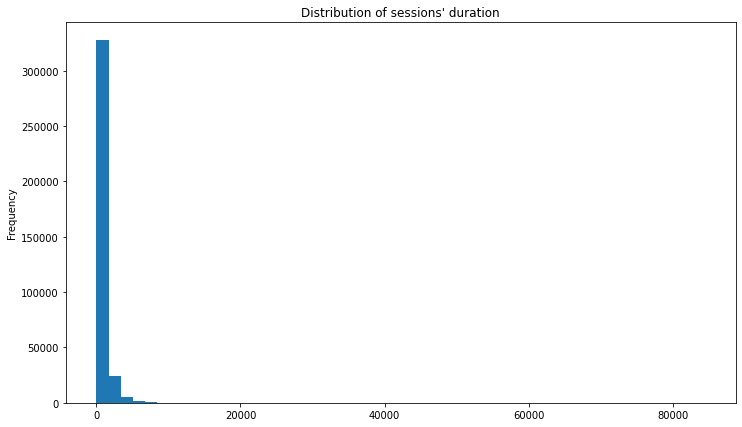

In [47]:
# plot histogram to see the distribution
visits_product['session_duration_sec'].plot(kind='hist',bins=50, figsize=(12,7), xlabel='number of users', ylabel='session duration in seconds', title= "Distribution of sessions' duration")

When the distribution is normal or close to normal, you can take the mean or median. But in our case it's impossible, so we have to calculate the mode:

In [48]:
asl = visits_product['session_duration_sec'].mode()
asl

0    60
dtype: int64

It is also interesting to see if the average session length of device types are the same. Let us have a look at that.


In [49]:
fig_devices = px.line(visits_product.groupby([visits_product['start_ts'].dt.date,'device'])['session_duration_sec'].mean().reset_index(),
                      x='start_ts', y='session_duration_sec', color='device')
fig_devices.show()

In general, the average session of desktop or web version of our product users are longer than the touch screen user or the mobile app users. Interesting point to mention is March 31, 2018 the drastic decrease happened to web users, most probably something with server had happened.

 - #### How often do users come back?

In [50]:
# creating user's first visit date
min_visit = visits_raw.groupby(['uid'])['start_ts'].min().reset_index()
min_visit.columns = ['uid', 'first_visit']
# merging data to
retention_data = visits_raw.merge(min_visit[['uid', 'first_visit']], on='uid', how='left')

# forming monthly cohorts
retention_data['cohort'] = retention_data['first_visit'].apply(lambda x: x.strftime('%Y-%m'))
retention_data.head(5)

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid         first_visit   cohort  
0  16879256277535980062 2017-12-20 17:20:00  2017-12  
1    104060357244891740 2018-02-19 16:53:00  2018-02  
2   7459035603376831527 2017-07-01 01:54:00  2017-07  
3  16174680259334210214 2018-03-09 20:05:00  2018-03  
4   9969694820036681168 2017-12-27 14:06:00  2017-12

In [51]:
# calculating retention day to see how many users came back after the first visit in a certain day
# certain days(0,7,14,30) when do we lose customers most
retention_data['retention_date'] = ((retention_data['start_ts']-retention_data['first_visit'])/np.timedelta64(1,'D')).astype(int)
retention_data.head(5)

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid         first_visit   cohort  retention_date  
0  16879256277535980062 2017-12-20 17:20:00  2017-12               0  
1    104060357244891740 2018-02-19 16:53:00  2018-02               0  
2   7459035603376831527 2017-07-01 01:54:00  2017-07               0  
3  16174680259334210214 2018-03-09 20:05:00  2018-03              71  
4   9969694820036681168 2017-12-27 14:06:00  2017-12               0

In [52]:
# retention date = 0, means the it is the same day as their first visit, so we disregard retention dates equalling 0
retention_data_clean = retention_data.query('retention_date > 0')
retention_data_clean.head(5)

device              end_ts  source_id            start_ts  \
3   desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
6   desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   
12  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
14    touch 2018-04-23 18:01:00          9 2018-04-23 18:00:00   
15    touch 2018-02-12 20:30:00          2 2018-02-12 19:24:00   

                     uid         first_visit   cohort  retention_date  
3   16174680259334210214 2018-03-09 20:05:00  2018-03              71  
6    6661610529277171451 2017-06-29 09:00:00  2017-06             215  
12   8056418121947262981 2017-06-04 14:17:00  2017-06             247  
14  18026419100367255411 2017-10-04 22:44:00  2017-10             200  
15  18188358787673499603 2018-02-10 12:17:00  2018-02               2

In [53]:
# creating a  function to calculate retention rates for certain days
retention_list = [1,7,14,30]
def retention(retention_day, group):
    grouped = (retention_data_clean.query('retention_date == @retention_day').groupby(group)['uid'].nunique()\
    /retention_data.groupby(group)['uid'].nunique())*100
    grouped = grouped.reset_index().rename(columns={'uid': 'Retention_{}%'.format(retention_day)}).fillna('0')
    return grouped

In [54]:
# let us have a look at 7th day retention of users by source id
retention(7, 'source_id')

source_id Retention_7%
0          1     1.173746
1          2     1.280244
2          3     0.258173
3          4     0.454954
4          5     0.321199
5          6            0
6          7            0
7          9     0.982297
8         10     0.334697

Source 1 and 2 have relatively higher retention rates on the 7th day after user's first registration date. 1.2 % of total users came back a week after from their first visit from sources 1-2.

In [55]:
# to see the whole picture we have to calculate retentions for all periods
retention_by_source = []
for i in retention_list:
    retention_by_source.append(retention(i, 'source_id'))

In [56]:
retention_by_source = pd.concat(retention_by_source, axis=1)
retention_by_source = retention_by_source.loc[:, ~retention_by_source.columns.duplicated()]

In [57]:
retention_by_source

source_id Retention_1% Retention_7% Retention_14% Retention_30%
0          1     4.837097     1.173746      0.894784       0.36844
1          2     3.036769     1.280244      0.944942      0.419127
2          3     0.865482     0.258173      0.228744       0.14447
3          4     1.115834     0.454954      0.312481      0.173601
4          5     0.909187     0.321199      0.254502      0.133394
5          6            0            0             0             0
6          7            0            0             0             0
7          9      1.01468     0.982297      0.993092      0.334629
8         10     1.648692     0.334697      0.285112      0.136358

In [58]:
# let us a have look at retention rates by month which cohort column in our dataset
retention_by_cohort = []
for i in retention_list:
    retention_by_cohort.append(retention(i, 'cohort'))

In [59]:
retention_by_cohort = pd.concat(retention_by_cohort, axis=1)
retention_by_cohort = retention_by_cohort.loc[:, ~retention_by_cohort.columns.duplicated()]

In [60]:
retention_by_cohort

cohort  Retention_1%  Retention_7%  Retention_14%  Retention_30%
0   2017-06      1.772381      0.822083       0.739121       0.377102
1   2017-07      1.811263      0.555556       0.418569       0.235921
2   2017-08      1.109911      0.559866       0.373244       0.255378
3   2017-09      1.466715      0.562739       0.610632       0.293343
4   2017-10      1.724603      0.646726       0.612080       0.327213
5   2017-11      2.286406      0.891809       0.664269       0.260570
6   2017-12      1.697800      0.633212       0.427418       0.257242
7   2018-01      1.622171      0.530410       0.380127       0.198904
8   2018-02      1.522728      0.608190       0.396450       0.216245
9   2018-03      1.568799      0.427413       0.305989       0.155423
10  2018-04      1.375008      0.439239       0.280094       0.133681
11  2018-05      1.381523      0.320828       0.163688       0.019643

In [61]:
# There's also the sticky factor. This metric tells you how loyal the audience is — how often they return to the app. 
# The formula is simple: sticky factor = DAU/WAU or sticky factor = DAU/MAU.
sticky_wau = (dau_mean / wau_mean)
sticky_mau = (dau_mean / mau_mean)
print("{:.2%} of users come back weekly". format(sticky_wau))
print("{:.2%} of users come back monthly".format(sticky_mau))

15.86% of users come back weekly
3.91% of users come back monthly


We calculated sticky factor metric which tells us how loyal the audience is - how often they return to the app/web page.
 - We had 5,825.29 weekly active users and 932 of them revisit the app/web page on a weekly basis.
 - Out of  23,228 monthly active users 9,291 of them return on monthly basis.

2. #### Sales :  When do people start buying?

We are talking about Conversion here. How long does it take from first visit to purchase in days. So for each user you need to find the date of first visit and the date of first order. 

In [62]:
# creating copy of raw order dataset
orders_sales = orders_raw.copy()
orders_sales.sample()

order_date  revenue                  uid
29699 2018-01-16 22:54:00     0.17  1375915484177117300

In [63]:
# calculating first order date
first_order_date_by_customers = orders_sales.groupby('uid')['order_date'].min()
first_order_date_by_customers.head(5)

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: order_date, dtype: datetime64[ns]

In [64]:
# renaming Series object
first_order_date_by_customers.name = 'first_order_date'

In [65]:
# adding first_order_date column to orders datasest
orders_sales = orders_sales.join(first_order_date_by_customers, on='uid')

In [66]:
orders_sales.head(5)

order_date  revenue                   uid    first_order_date
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00

In [67]:
# selecting month from first_buy_date column; convert the column values to the 'datetime64[M]' type - for month
orders_sales['first_order_month'] = orders_sales['first_order_date'].astype('datetime64[M]')

# selecting months from order_month column
orders_sales['order_month'] = orders_sales['order_date'].astype('datetime64[M]')

orders_sales.head(5)

order_date  revenue                   uid    first_order_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_order_month order_month  
0        2017-06-01  2017-06-01  
1        2017-06-01  2017-06-01  
2        2017-06-01  2017-06-01  
3        2017-06-01  2017-06-01  
4        2017-06-01  2017-06-01

In [68]:
# The first_order_month column will thus be used to form monthly cohorts.
# Let's group the data by this column and evaluate the metrics for each cohort.
cohort_grouped = orders_sales.groupby('first_order_month').agg({'uid':'nunique', 'revenue':'sum'})
cohort_grouped

uid   revenue
first_order_month                
2017-06-01         2023  24031.69
2017-07-01         1923  16127.92
2017-08-01         1370  11606.26
2017-09-01         2581  34676.32
2017-10-01         4340  27603.45
2017-11-01         4081  26098.99
2017-12-01         4383  33485.74
2018-01-01         3373  16663.13
2018-02-01         3651  16750.50
2018-03-01         3533  19273.41
2018-04-01         2276  11810.61
2018-05-01         2988  13925.76
2018-06-01            1      3.42

 - The revenue across cohorts are different. Maybe it is matter of seasonality. If we take a look at September and October 2017 cohorts, the total number of customers who ordered are much higher in October(4340 orders) but their revenue is lower than September customers(2581 orders).<br> Its not about the quantity, all is about quality :)
 - Another important aspect worth to mention is that Yandex. Afisha advertises events and upcoming movies/cartoons/concerts/shows. So its highly dependent on the season. For instance, people might be waiting for their  favorite movie coming out in theatres in a certain month, consequenly the revenue of that month will be relatively higher than previous months due to that particular event.

In [69]:
# bonus calculation
# number of visits by unique id
number_visits = visits_product['uid'].nunique()

# number of orders
number_orders = orders_raw['uid'].nunique()

# conversion rate
cr = number_orders / number_visits
print("Conversion rate :{:.2%}".format(cr))

Conversion rate :16.01%


 - 16 % of our visitors whether it be from desktop or any touch screen devices who are looking for their desired product turn into buyers.

<div class="alert alert-info"> <b>Student's comment:</b> Adding conversion rate calculation.</div> 

In [70]:
# merging data of visits and orders
conversion_data = orders_sales.merge(min_visit[['uid', 'first_visit']], on='uid', how='left')

# adding cohort column
conversion_data['cohort']  = conversion_data['first_visit'].apply(lambda x: x.strftime('%Y-%m'))
conversion_data

order_date  revenue                   uid    first_order_date  \
0     2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   
...                   ...      ...                   ...                 ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31 23:50:00   
50411 2018-05-31 23:50:00     5.80  11369640365507475976 2018-05-31 23:50:00   
50412 2018-05-31 23:54:00     0.30   1786462140797698849 2018-05-31 23:54:00   
50413 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31 23:56:00   
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01 00:02:00   

      first_order_month order_month         first_visit   cohort  
0            2017-06-01  2017-06-01 2017-06-01 00:09:00  2017-06  
1            2017-06-01  2017-06-01 2017-06-01 00:14:00  2017-06  
2            2017-06-01  2017-06-01 2017-06-01 00:25:00  2017-06  
3            2017-06-01  2017-06-01 2017-06-01 00:14:00  2017-06  
4            2017-06-01  2017-06-01 2017-06-01 07:31:00  2017-06  
...                 ...         ...                 ...      ...  
50410        2018-05-01  2018-05-01 2018-05-31 09:11:00  2018-05  
50411        2018-05-01  2018-05-01 2018-05-31 23:05:00  2018-05  
50412        2018-05-01  2018-05-01 2018-05-31 23:52:00  2018-05  
50413        2018-05-01  2018-05-01 2017-10-23 12:32:00  2017-10  
50414        2018-06-01  2018-06-01 2018-05-31 23:59:00  2018-05  

[50415 rows x 8 columns]

In [71]:
# adding purchase date from first visit
conversion_data['purchase_date'] = ((conversion_data['order_date']-conversion_data['first_visit'])/np.timedelta64(1,'D')).astype(int)
conversion_data

order_date  revenue                   uid    first_order_date  \
0     2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   
...                   ...      ...                   ...                 ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31 23:50:00   
50411 2018-05-31 23:50:00     5.80  11369640365507475976 2018-05-31 23:50:00   
50412 2018-05-31 23:54:00     0.30   1786462140797698849 2018-05-31 23:54:00   
50413 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31 23:56:00   
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01 00:02:00   

      first_order_month order_month         first_visit   cohort  \
0            2017-06-01  2017-06-01 2017-06-01 00:09:00  2017-06   
1            2017-06-01  2017-06-01 2017-06-01 00:14:00  2017-06   
2            2017-06-01  2017-06-01 2017-06-01 00:25:00  2017-06   
3            2017-06-01  2017-06-01 2017-06-01 00:14:00  2017-06   
4            2017-06-01  2017-06-01 2017-06-01 07:31:00  2017-06   
...                 ...         ...                 ...      ...   
50410        2018-05-01  2018-05-01 2018-05-31 09:11:00  2018-05   
50411        2018-05-01  2018-05-01 2018-05-31 23:05:00  2018-05   
50412        2018-05-01  2018-05-01 2018-05-31 23:52:00  2018-05   
50413        2018-05-01  2018-05-01 2017-10-23 12:32:00  2017-10   
50414        2018-06-01  2018-06-01 2018-05-31 23:59:00  2018-05   

       purchase_date  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
50410              0  
50411              0  
50412              0  
50413            220  
50414              0  

[50415 rows x 9 columns]

In [72]:
# creating a  function to calculate conversion rates for certain days
conversion_list = [0,1,7,14,30]
def conversion(conversion_day, group):
    grouped = (conversion_data.query('purchase_date <= @conversion_day').groupby(group)['uid'].nunique()\
    /retention_data.groupby(group)['uid'].nunique())*100
    grouped = grouped.reset_index().rename(columns={'uid':'Conversion_{}%'.format(conversion_day)}).fillna('0')
    return grouped

In [73]:
conversion(7, 'cohort')

cohort  Conversion_7%
0   2017-06      14.948337
1   2017-07      12.960426
2   2017-08      11.727728
3   2017-09      13.302203
4   2017-10      14.147130
5   2017-11      12.041251
6   2017-12      13.376603
7   2018-01      11.549682
8   2018-02      12.654863
9   2018-03      12.569819
10  2018-04      11.089185
11  2018-05      14.758070

**Note** Conversions are cumulative calculation. For example, we calculated conversion by cohorts within 7 days (a week) of users' visit. In July, 2017 14.9% of total visitors bought their needed product within 7 days of their activity on app.

In [74]:
# let us a have look at retention rates by month which cohort column in our dataset
conversion_by_cohort = []
for i in conversion_list:
    conversion_by_cohort.append(conversion(i, 'cohort'))

In [75]:
conversion_by_cohort = pd.concat(conversion_by_cohort, axis=1)
conversion_by_cohort = conversion_by_cohort.loc[:, ~conversion_by_cohort.columns.duplicated()]

In [76]:
conversion_by_cohort

cohort  Conversion_0%  Conversion_1%  Conversion_7%  Conversion_14%  \
0   2017-06      13.605853      14.020665      14.948337       15.325439   
1   2017-07      11.613394      12.062405      12.960426       13.340944   
2   2017-08      10.774973      11.040173      11.727728       12.042039   
3   2017-09      11.769636      12.194684      13.302203       13.799090   
4   2017-10      12.711245      13.165493      14.147130       14.574431   
5   2017-11      10.518203      11.050352      12.041251       12.639460   
6   2017-12      11.841064      12.335761      13.376603       13.796106   
7   2018-01      10.281117      10.696605      11.549682       11.907709   
8   2018-02      11.181691      11.609677      12.654863       13.019777   
9   2018-03      11.506144      11.899558      12.569819       12.904949   
10  2018-04       9.911516      10.299828      11.089185       11.432937   
11  2018-05      13.592614      14.116415      14.758070       15.072350   

    Conversion_30%  
0        16.057018  
1        13.744292  
2        12.670661  
3        14.661159  
4        15.278901  
5        13.336759  
6        14.306633  
7        12.482320  
8        13.515340  
9        13.308077  
10       11.770323  
11       15.164015

In [77]:
conversion_source = pd.merge(conversion_data, visits_raw, on='uid', how='left')
conversion_source

order_date  revenue                   uid    first_order_date  \
0      2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1      2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2      2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3      2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4      2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   
...                    ...      ...                   ...                 ...   
761802 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31 23:56:00   
761803 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31 23:56:00   
761804 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31 23:56:00   
761805 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31 23:56:00   
761806 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01 00:02:00   

       first_order_month order_month         first_visit   cohort  \
0             2017-06-01  2017-06-01 2017-06-01 00:09:00  2017-06   
1             2017-06-01  2017-06-01 2017-06-01 00:14:00  2017-06   
2             2017-06-01  2017-06-01 2017-06-01 00:25:00  2017-06   
3             2017-06-01  2017-06-01 2017-06-01 00:14:00  2017-06   
4             2017-06-01  2017-06-01 2017-06-01 07:31:00  2017-06   
...                  ...         ...                 ...      ...   
761802        2018-05-01  2018-05-01 2017-10-23 12:32:00  2017-10   
761803        2018-05-01  2018-05-01 2017-10-23 12:32:00  2017-10   
761804        2018-05-01  2018-05-01 2017-10-23 12:32:00  2017-10   
761805        2018-05-01  2018-05-01 2017-10-23 12:32:00  2017-10   
761806        2018-06-01  2018-06-01 2018-05-31 23:59:00  2018-05   

        purchase_date   device              end_ts  source_id  \
0                   0  desktop 2017-06-01 00:11:00          1   
1                   0  desktop 2017-06-01 00:25:00          2   
2                   0  desktop 2017-06-01 00:34:00          2   
3                   0  desktop 2017-06-01 00:33:00          2   
4                   0  desktop 2017-06-01 07:59:00          3   
...               ...      ...                 ...        ...   
761802            220  desktop 2018-01-15 10:47:00          4   
761803            220  desktop 2017-12-12 16:21:00          5   
761804            220  desktop 2017-10-23 12:36:00          3   
761805            220  desktop 2017-11-15 17:18:00          4   
761806              0  desktop 2018-06-01 00:04:00          4   

                  start_ts  
0      2017-06-01 00:09:00  
1      2017-06-01 00:14:00  
2      2017-06-01 00:25:00  
3      2017-06-01 00:14:00  
4      2017-06-01 07:31:00  
...                    ...  
761802 2018-01-15 10:39:00  
761803 2017-12-12 16:20:00  
761804 2017-10-23 12:32:00  
761805 2017-11-15 17:08:00  
761806 2018-05-31 23:59:00  

[761807 rows x 13 columns]

In [78]:
def conversion_source_id(conversion_day, group):
    grouped = (conversion_source.query('purchase_date <= @conversion_day').groupby(group)['uid'].nunique()\
    /retention_data.groupby(group)['uid'].nunique())*100
    grouped = grouped.reset_index().rename(columns={'uid':'Conversion_{}%'.format(conversion_day)}).fillna('0')
    return grouped

In [79]:
conversion_source_id(1,'source_id')

source_id Conversion_1%
0          1     23.806516
1          2     16.502191
2          3     12.570228
3          4     11.425322
4          5     12.598729
5          6             0
6          7      2.941176
7          9       16.7962
8         10     15.470435

In [80]:
# let us a have look at retention rates by month which cohort column in our dataset
conversion_by_source = []
for i in conversion_list:
    conversion_by_source.append(conversion_source_id(i, 'source_id'))

In [81]:
conversion_by_source = pd.concat(conversion_by_source, axis=1)
conversion_by_source = conversion_by_source.loc[:, ~conversion_by_source.columns.duplicated()]

In [82]:
conversion_by_cohort

cohort  Conversion_0%  Conversion_1%  Conversion_7%  Conversion_14%  \
0   2017-06      13.605853      14.020665      14.948337       15.325439   
1   2017-07      11.613394      12.062405      12.960426       13.340944   
2   2017-08      10.774973      11.040173      11.727728       12.042039   
3   2017-09      11.769636      12.194684      13.302203       13.799090   
4   2017-10      12.711245      13.165493      14.147130       14.574431   
5   2017-11      10.518203      11.050352      12.041251       12.639460   
6   2017-12      11.841064      12.335761      13.376603       13.796106   
7   2018-01      10.281117      10.696605      11.549682       11.907709   
8   2018-02      11.181691      11.609677      12.654863       13.019777   
9   2018-03      11.506144      11.899558      12.569819       12.904949   
10  2018-04       9.911516      10.299828      11.089185       11.432937   
11  2018-05      13.592614      14.116415      14.758070       15.072350   

    Conversion_30%  
0        16.057018  
1        13.744292  
2        12.670661  
3        14.661159  
4        15.278901  
5        13.336759  
6        14.306633  
7        12.482320  
8        13.515340  
9        13.308077  
10       11.770323  
11       15.164015

In [83]:
conversion_by_source

source_id Conversion_0% Conversion_1% Conversion_7% Conversion_14%  \
0          1     22.122217     23.806516     26.990894      28.464656   
1          2      15.42008     16.502191     18.803582      19.984759   
2          3     12.000375     12.570228     13.808925      14.345337   
3          4     10.890153     11.425322     12.627357       13.16971   
4          5     12.102011     12.598729     13.671148      14.141538   
5          6             0             0             0              0   
6          7      2.941176      2.941176      2.941176       2.941176   
7          9     15.965026       16.7962     18.901123      19.937392   
8         10     14.466344     15.470435     16.846411      17.453824   

  Conversion_30%  
0      30.348966  
1        21.5241  
2       15.11183  
3       13.94792  
4      14.826061  
5              0  
6       2.941176  
7      21.783247  
8      18.259576

#### Conclusion

<div class="alert alert-info"> We have calculated when user come back previously, and in this section we calculated when they convert from visitors to buyers that refers to conversion. We have calculated the conversion rates with the same logic as retention rates, the difference is the dataframe where we focus on orders rather than just visits.<br>
 - According to the tables above, conversions by cohort and by source_ids, since it is cumulative figure, we dont need to compare it with previus timeframe. In general, conversion rate lies between 12-16 % monthly across cohorts, where we can observe that the first cohort, June 2017 was more profitable with 16.05 % conversion rate than any other cohorts.<br>
 - If we look at conversion rates by source, users coming from source 1 have the highest purchasing rate withing  30 days = 30.3 % followed by source 9 = 21.7 % conversion rate
</div> 

 - #### How many orders do they make during a given period of time?

In [84]:
# extracting only year and month for better presentation
orders_sales['order_month'] = orders_sales['order_month'].dt.strftime('%Y-%m')

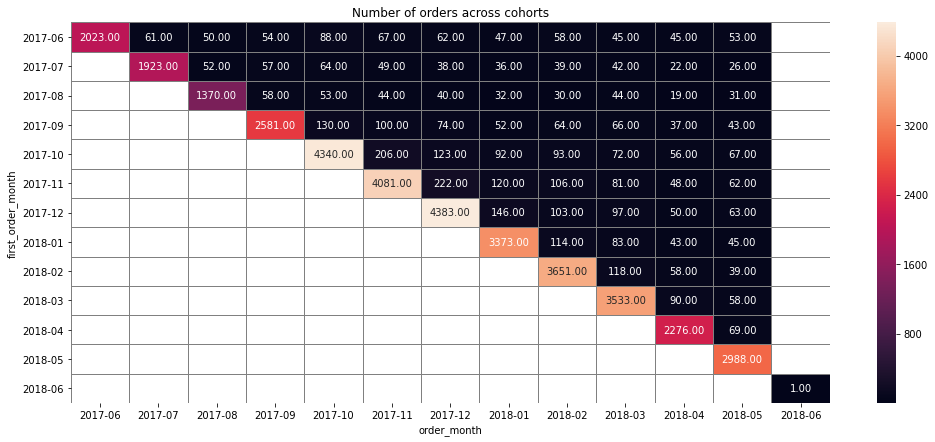

In [85]:
# The first task that can be solved using cohort analysis is tracking changes in the number of active buyers within a single cohort. 
# This will tell us how many people continue making purchases in the months following the month of the first purchase.
orders_sales['first_order_month'] = orders_sales['first_order_month'].dt.strftime('%Y-%m')
orders_sales_pivot = orders_sales.pivot_table(
    index='first_order_month',
    columns = 'order_month',
    values = 'uid',
    aggfunc = 'nunique'

)


plt.figure(figsize=(17,7))
plt.title('Number of orders across cohorts')
sns.heatmap( 
    orders_sales_pivot,
    annot = True,
    fmt ='.2f',
    linewidths = 1,
    linecolor = 'gray'
)
plt.show()


##### Conclusions can be drawn from this table:
 - The number of active users decreases after the first month of their purchase. Only 61 people made purchase the following month after their first purchase and 50 the following month. Maybe they had not good experience of their purchase process, it took them long or the app couldnt accept various types of payments.
 - We can see the decrease in the amount of purchase in every single cohort which sounds scary in terms of profitability. Some actions need to be taken to get back to track in this business. Maybe the app or the website must be updated regularly.

 - #### What is the average purchase size?

In [86]:
# find out how the average revenue per user (total sales divided by the number of customers) changes over time
# calculate average revenue per user for each month
orders_grouped_by_cohort = orders_sales.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum', 'uid': 'nunique'}).reset_index()
orders_grouped_by_cohort.columns = ['first_order_month', 'order_month', 'revenue','uid']
orders_grouped_by_cohort

first_order_month order_month   revenue   uid
0            2017-06     2017-06   9557.49  2023
1            2017-06     2017-07    981.82    61
2            2017-06     2017-08    885.34    50
3            2017-06     2017-09   1931.30    54
4            2017-06     2017-10   2068.58    88
..               ...         ...       ...   ...
74           2018-03     2018-05   1114.87    58
75           2018-04     2018-04  10600.69  2276
76           2018-04     2018-05   1209.92    69
77           2018-05     2018-05  13925.76  2988
78           2018-06     2018-06      3.42     1

[79 rows x 4 columns]

In [87]:
# calculating revenue per user, dividing revenue of that month by number of customers
orders_grouped_by_cohort['revenue_per_user'] = (orders_grouped_by_cohort['revenue'] / orders_grouped_by_cohort['uid'])
orders_grouped_by_cohort.pivot_table(
    index = 'first_order_month',
    columns = 'order_month',
    values = 'revenue_per_user',
    aggfunc = 'mean'
).fillna('')

order_month         2017-06   2017-07    2017-08    2017-09    2017-10  \
first_order_month                                                        
2017-06            4.724414  16.09541    17.7068  35.764815  23.506591   
2017-07                      6.010218  12.396346  21.035965  10.786094   
2017-08                                 5.276518  11.148793  11.851321   
2017-09                                            5.644529  22.188385   
2017-10                                                       5.003733   
2017-11                                                                  
2017-12                                                                  
2018-01                                                                  
2018-02                                                                  
2018-03                                                                  
2018-04                                                                  
2018-05                                                                  
2018-06                                                                  

order_month          2017-11     2017-12    2018-01    2018-02    2018-03  \
first_order_month                                                           
2017-06            22.207761   31.011935  25.033191   19.29569  27.233556   
2017-07             6.938163    7.896842   6.421111   6.992821   7.382143   
2017-08            12.182955    16.92125  12.139063   9.620333  12.610455   
2017-09              13.4452  138.669189  19.881538     26.095  27.437121   
2017-10            11.287427    6.753252   7.413152   7.072796   7.255139   
2017-11             5.154683    7.339054   6.786583   12.51066   7.457284   
2017-12                         4.738191   7.816575  39.366019  48.135052   
2018-01                                    4.135636   8.721228  12.365542   
2018-02                                               4.156987       8.61   
2018-03                                                          4.838803   
2018-04                                                                     
2018-05                                                                     
2018-06                                                                     

order_month          2018-04    2018-05 2018-06  
first_order_month                                
2017-06            25.681333   9.804151          
2017-07            12.861818  11.513846          
2017-08                21.07   8.307419          
2017-09            16.961351  11.044651          
2017-10             6.573214   7.479701          
2017-11             4.580833   7.564839          
2017-12              27.4314  23.518413          
2018-01            11.199767   4.699556          
2018-02             4.942414   6.941026          
2018-03            11.811667  19.221897          
2018-04             4.657597  17.535072          
2018-05                        4.660562          
2018-06                                    3.42

 - The average revenue per user increases right after the first month of purchase. We can see this in all cohorts. The July 2017 cohort has the highest average revenue per user =  $ 6.01 .
 - We have to note that despite the decrease in the number of users, we can see the increase on the revenue mainly because this is the average revenue per user, not average monthly revenue.

In [88]:
orders_grouped_by_cohort.dtypes

first_order_month     object
order_month           object
revenue              float64
uid                    int64
revenue_per_user     float64
dtype: object

In [89]:
# converting to datetime for further calculation
orders_grouped_by_cohort['order_month'] = pd.to_datetime(orders_grouped_by_cohort['order_month'])
orders_grouped_by_cohort['first_order_month'] = pd.to_datetime(orders_grouped_by_cohort['first_order_month'])

In [90]:
# But what if we need to assess changes in revenue per user in relation to the time that's passed since the first purchase? 
# In the context of cohorts, this figure is called the lifetime.
orders_grouped_by_cohort = orders_grouped_by_cohort.reset_index()
orders_grouped_by_cohort['cohort_lifetime'] = (orders_grouped_by_cohort['order_month'] - orders_grouped_by_cohort['first_order_month'])
orders_grouped_by_cohort['cohort_lifetime'].head(5)

0     0 days
1    30 days
2    61 days
3    92 days
4   122 days
Name: cohort_lifetime, dtype: timedelta64[ns]

In [91]:
# convert this type to the number of months between the two dates.
# divide cohort_lifetime by the constant value np.timedelta64(1,'M')
orders_grouped_by_cohort['cohort_lifetime'] = orders_grouped_by_cohort['cohort_lifetime'] / np.timedelta64(1,'M')
orders_grouped_by_cohort['cohort_lifetime'].head(5)

0    0.000000
1    0.985647
2    2.004148
3    3.022649
4    4.008296
Name: cohort_lifetime, dtype: float64

We got fractions. That's because the constant value np.timedelta64(1,'M') is the average duration of months in a year. Months have from 28 to 31 days; hence the fractions. Let's round the cohort_lifetime column values using the round() method, then convert them to integers with the astype('int') method

In [92]:
orders_grouped_by_cohort['cohort_lifetime'] = (orders_grouped_by_cohort['cohort_lifetime'].round().astype('int'))
orders_grouped_by_cohort['cohort_lifetime'].head(5)

0    0
1    1
2    2
3    3
4    4
Name: cohort_lifetime, dtype: int64

Now we have integer month numbers. They tell us the number of the month of purchase relative to the cohort month.<br>
The first purchase month relates to cohort number 0.<br>
The higher the number of cohort which is lifetime month, the more loyal is the user.

Once all the calculations have been made, we leave only the year and month in the cohort identifier. Let's use the dt.strftime() (string format time) method, which turns Series objects of datetime type into strings in date format.

In [93]:
# Let's leave only the year and month in the data on month of first purchase
orders_grouped_by_cohort['first_order_month'] = orders_grouped_by_cohort[
    'first_order_month'
].dt.strftime('%Y-%m')

In [94]:
revenue_per_user_pivot = orders_grouped_by_cohort.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean',
)

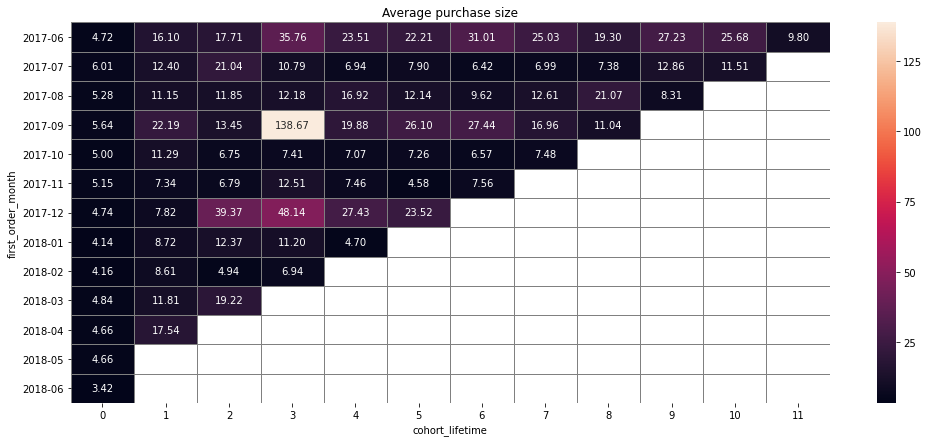

In [95]:
# plotting heatmap
plt.figure(figsize=(17,7))
plt.title('Average purchase size')
sns.heatmap( 
    revenue_per_user_pivot,
    annot = True,
    fmt ='.2f',
    linewidths = 1,
    linecolor = 'gray'
)
plt.show()

#### Conclusion

 - As we have mentioned already, the revenue per user increased over time in all cohorts. Let us have a glance at September 2017 cohort lifetimes from 2nd to 3rd, the revenue per user increased drastically from 13.44 to 138.67. Some supercrowded events must have happened during that month.

 - In all cohorts, the average revenue per user of the 1st month is greater than that in the 0th. This implies that customers dont become active buyers right away, but after some time has passed. Also there are cohorts where the average revenue per user sky rockets. The average purchase size of September 2017 clearly stands out. There are maybe some record breaking event has occured in that month. The December 2017 cohort shows insteresting user behavior starting from second month with increase in purchase size.

 - #### How much money do they bring? (LTV)

In [96]:
orders_cac = orders_raw.copy()

In [97]:
# calculating first order date
first_orders = orders_cac.groupby('uid')['order_date'].min()
first_orders.head(5)

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: order_date, dtype: datetime64[ns]

In [98]:
# renaming Series object
first_orders.name = 'first_order_date'

In [99]:
# adding first_order_date column to orders datasest
orders_cac = orders_cac.join(first_orders, on='uid')

In [100]:
orders_cac.sample()

order_date  revenue                   uid    first_order_date
20434 2017-11-27 13:04:00     2.44  11310766428293703583 2017-11-27 13:04:00

In [101]:
# selecting month from first_buy_date column; convert the column values to the 'datetime64[M]' type - for month
orders_cac['first_order_month'] = orders_cac['first_order_date'].astype('datetime64[M]')

# selecting months from order_month column
orders_cac['order_month'] = orders_cac['order_date'].astype('datetime64[M]')

orders_cac.head(5)

order_date  revenue                   uid    first_order_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_order_month order_month  
0        2017-06-01  2017-06-01  
1        2017-06-01  2017-06-01  
2        2017-06-01  2017-06-01  
3        2017-06-01  2017-06-01  
4        2017-06-01  2017-06-01

In [102]:
cohorts = orders_cac.groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index()
cohorts.sample()

first_order_month order_month  revenue
4        2017-06-01  2017-10-01  2068.58

In [103]:
cohort_size = orders_cac.groupby('first_order_month').agg({'uid':'nunique'})
cohort_size

uid
first_order_month      
2017-06-01         2023
2017-07-01         1923
2017-08-01         1370
2017-09-01         2581
2017-10-01         4340
2017-11-01         4081
2017-12-01         4383
2018-01-01         3373
2018-02-01         3651
2018-03-01         3533
2018-04-01         2276
2018-05-01         2988
2018-06-01            1

In [104]:
# merging datasets into single
report = pd.merge(cohort_size, cohorts, on = 'first_order_month')
report.columns = ['first_order_month', 'n_buyers', 'order_month',  'revenue']
report.sample()

first_order_month  n_buyers order_month   revenue
12        2017-07-01      1923  2017-07-01  11557.65

In [105]:
# converting to datetime
report['order_month'] = pd.to_datetime(report['order_month'])
report['first_order_month'] = pd.to_datetime(report['first_order_month'])

In [106]:
# there is no information about margin rate, we take pure revenue
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype(int)
report.sample()

first_order_month  n_buyers order_month  revenue  age
19        2017-07-01      1923  2018-02-01   272.72    7

In [107]:
report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m')

In [108]:
#  LTV is a cohort's cumulative revenue, accounting for the number of people in the cohort; cumsum() method will be used
# calculating LTV
report['ltv'] = report['revenue'] / report['n_buyers']
output = report.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv',
    aggfunc='mean')

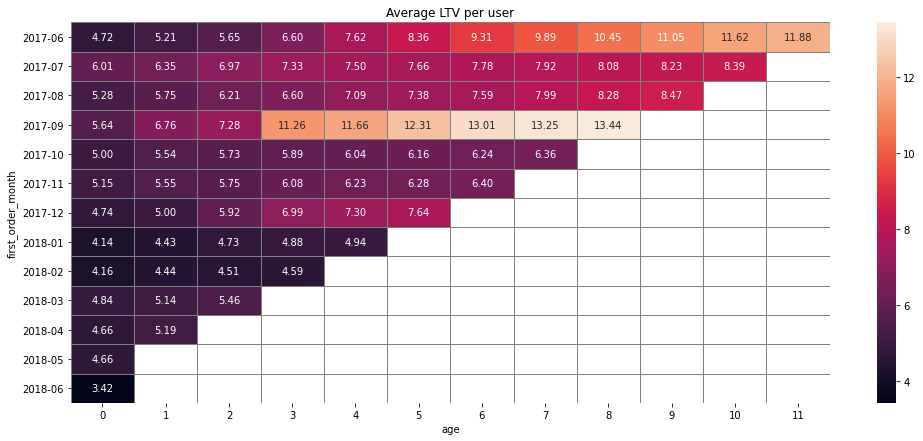

In [109]:
output_heatmap = output.cumsum(axis=1)
plt.figure(figsize=(17,7))
plt.title('Average LTV per user')
sns.heatmap( 
    output_heatmap,
    annot = True,
    fmt ='.2f',
    linewidths = 1,
    linecolor = 'gray'
)
plt.show()

#### Conclusion

 - Lifetime revenue per user differs across cohorts mostly because of seasonality as we have mentioned before. Let us take examples of two cohorts with the highest revenue per user's lifetime. July 2017 which is our first cohort, on average each customer brough  11.88 USD  in revenue over their eleventh-month lifetime, whereas September 2017 cohort users brought 13.44 USD within thier eighth lifetime. It would be relatively logical  the ratio of ltv and cost of customer acquisiton to see where the company stands in terms of return on marketing investment.

---

#### Conclusion

<div class="alert alert-info"> 
In this section, we went through these metrics and these conclusion can be made:<br>
    1. Conversion rate --> Users are mostly determinant during their first month where 16% of total users made a purchase and the following month conversion decreased. In the last month of report period May 2018, conversion rate was 15 % which is and increase comparing to previous months, thats a good sign.<br>
    2. Users' number of orders also differ across cohorts due to seasonality. The most profitable time for company and for users as well start from October 2017(4340 orders) to December 2017 (4383 orders) where they make most of the orders throughout the year. This could be explained by the seasonality of products.<br>
    3. Users' average purchase size --> n all cohorts, the average revenue per user of the 1st month is greater than that in the 0th. This implies that customers dont become active buyers right away, but after some time has passed.<br>
    4. Average Life-time value of users --> LTV lies between 4 - 13 USD per user. This is also cumulative metric in which September 2017 users bring the highest revenue = 13.44 USD.

</div> 

#### 3. Marketing
 - #### How much money was spent? Overall/per source/over time

In [110]:
costs_marketing = costs_raw.copy()

In [111]:
orders_marketing = orders_raw.copy()
orders_marketing.sample()

order_date  revenue                  uid
32992 2018-02-05 10:34:00     4.37  6279936374223017739

In [112]:
visits_marketing = visits_raw.copy()
visits_marketing.sample()

device              end_ts  source_id            start_ts  \
218137  desktop 2017-12-14 11:02:00          4 2017-12-14 10:48:00   

                         uid  
218137  14114686853697535606

In [113]:
# total financials
total_expenses = costs_marketing['ad_costs'].sum()
total_revenue = orders_marketing['revenue'].sum()

print('Total expenses of Yandex.Afisha: {:.2f} USD'.format(total_expenses))
print('Total revenue of Yandex.Afisha: {:.2f} USD' .format(total_revenue))


Total expenses of Yandex.Afisha: 329131.62 USD
Total revenue of Yandex.Afisha: 252057.20 USD


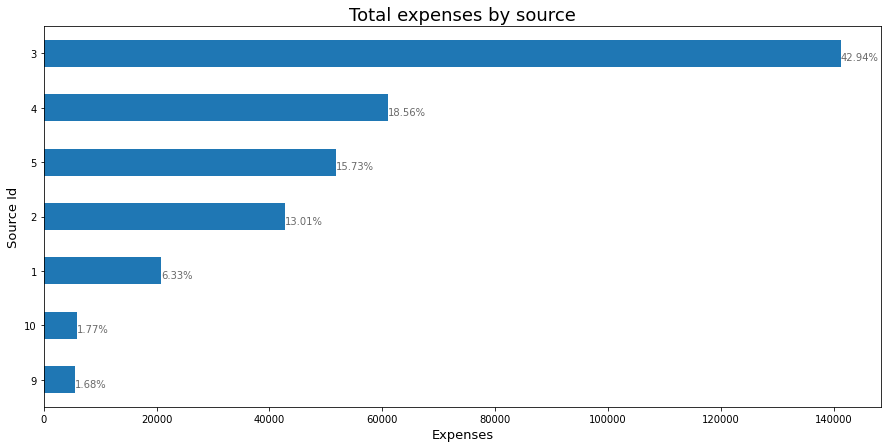

In [114]:
expenses_source = costs_marketing.groupby('source_id')['ad_costs'].sum().sort_values(ascending=False)
ax =  expenses_source.plot(kind='barh', figsize=(15,7))
ax.set_alpha(0.8)
ax.set_title("Total expenses by source", fontsize=18)
ax.set_xlabel("Expenses", fontsize=13);
ax.set_ylabel("Source Id", fontsize=13);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()


Company spends a lot on advertising for customers coming from source number 3 comparing other on sources. 43 % percentage of all total expenses are solely for source 3 which is quiet a lot investment. Company needs to diversify their investment on sources.

In [115]:
# creating year and date columns
costs_marketing['date_year'] = costs_marketing['date'].dt.year
costs_marketing['date_month'] = costs_marketing['date'].dt.month
costs_marketing.sample()

source_id       date  ad_costs  date_year  date_month
1078          3 2018-05-21    126.83       2018           5

date_year
2017    187961.15
2018    141170.47
Name: ad_costs, dtype: float64


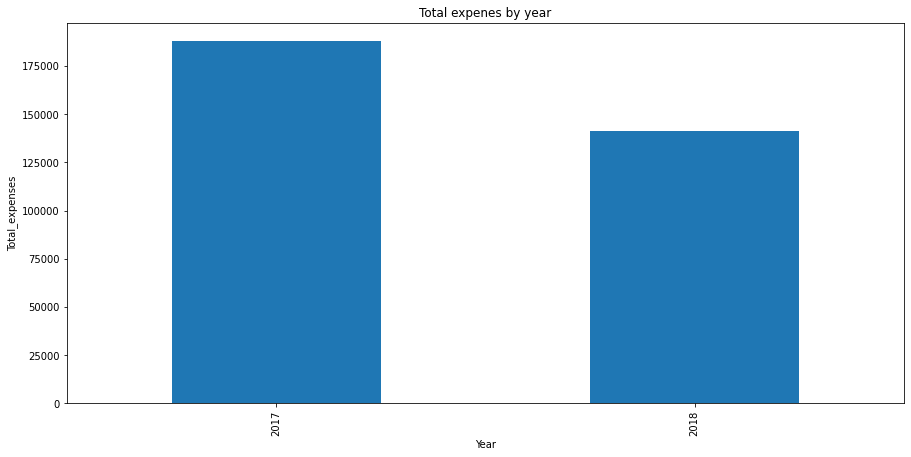

In [116]:
expenses_annually = costs_marketing.groupby('date_year')['ad_costs'].sum()
expenses_annually.plot(kind='bar', figsize=(15,7), title='Total expenes by year', xlabel='Year', ylabel='Total_expenses')
print(expenses_annually)

 - We observed that there were higher costs in 2017 than 2018.

In [117]:
# revenue columns
orders_marketing['order_year'] = orders_marketing['order_date'].dt.year
orders_marketing['order_month'] = orders_marketing['order_date'].dt.month
orders_marketing.sample()

order_date  revenue                   uid  order_year  \
18188 2017-11-17 23:28:00      5.8  13296819129737389551        2017   

       order_month  
18188           11

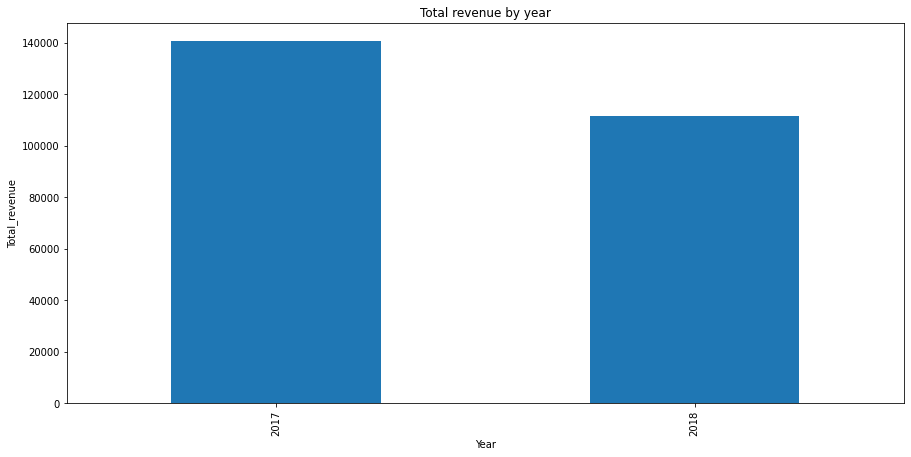

order_year
2017    140647.48
2018    111409.72
Name: revenue, dtype: float64


In [118]:
# grouping by year 
revenue_annually = orders_marketing.groupby('order_year')['revenue'].sum()
revenue_annually.plot(kind='bar', title='Total revenue by year', xlabel='Year', ylabel='Total_revenue', figsize=(15,7))
plt.show()
print(revenue_annually)

 - 2017 was more profitable year than 2018. The higher the revenue the higher the expenses of certain year. 

In [119]:
# expenses on monthly basis for 2 years
expenses_monthly = costs_marketing.groupby(['date_year', 'date_month']).agg({'ad_costs':'sum'}).reset_index()
expenses_monthly.columns = ['date_year', 'date_month', 'ad_costs']
expenses_monthly

date_year  date_month  ad_costs
0        2017           6  18015.00
1        2017           7  18240.59
2        2017           8  14790.54
3        2017           9  24368.91
4        2017          10  36322.88
5        2017          11  37907.88
6        2017          12  38315.35
7        2018           1  33518.52
8        2018           2  32723.03
9        2018           3  30415.27
10       2018           4  22289.38
11       2018           5  22224.27

In [120]:
# revenue on monthly basis
revenue_monthly = orders_marketing.groupby(['order_year', 'order_month']).agg({'revenue':'sum'}).reset_index()
revenue_monthly.columns = ['date_year', 'date_month', 'revenue']
revenue_monthly

date_year  date_month   revenue
0        2017           6   9557.49
1        2017           7  12539.47
2        2017           8   8758.78
3        2017           9  18345.51
4        2017          10  27987.70
5        2017          11  27069.93
6        2017          12  36388.60
7        2018           1  19417.13
8        2018           2  25560.54
9        2018           3  28834.59
10       2018           4  16858.06
11       2018           5  20735.98
12       2018           6      3.42

In [121]:
# merging expenses and revenue data
turnover = pd.merge(revenue_monthly, expenses_monthly, how='inner')
turnover

date_year  date_month   revenue  ad_costs
0        2017           6   9557.49  18015.00
1        2017           7  12539.47  18240.59
2        2017           8   8758.78  14790.54
3        2017           9  18345.51  24368.91
4        2017          10  27987.70  36322.88
5        2017          11  27069.93  37907.88
6        2017          12  36388.60  38315.35
7        2018           1  19417.13  33518.52
8        2018           2  25560.54  32723.03
9        2018           3  28834.59  30415.27
10       2018           4  16858.06  22289.38
11       2018           5  20735.98  22224.27

In [122]:
# calculating net profit/loss
turnover['net_profit_loss'] = turnover['revenue'] - turnover['ad_costs']
turnover

date_year  date_month   revenue  ad_costs  net_profit_loss
0        2017           6   9557.49  18015.00         -8457.51
1        2017           7  12539.47  18240.59         -5701.12
2        2017           8   8758.78  14790.54         -6031.76
3        2017           9  18345.51  24368.91         -6023.40
4        2017          10  27987.70  36322.88         -8335.18
5        2017          11  27069.93  37907.88        -10837.95
6        2017          12  36388.60  38315.35         -1926.75
7        2018           1  19417.13  33518.52        -14101.39
8        2018           2  25560.54  32723.03         -7162.49
9        2018           3  28834.59  30415.27         -1580.68
10       2018           4  16858.06  22289.38         -5431.32
11       2018           5  20735.98  22224.27         -1488.29

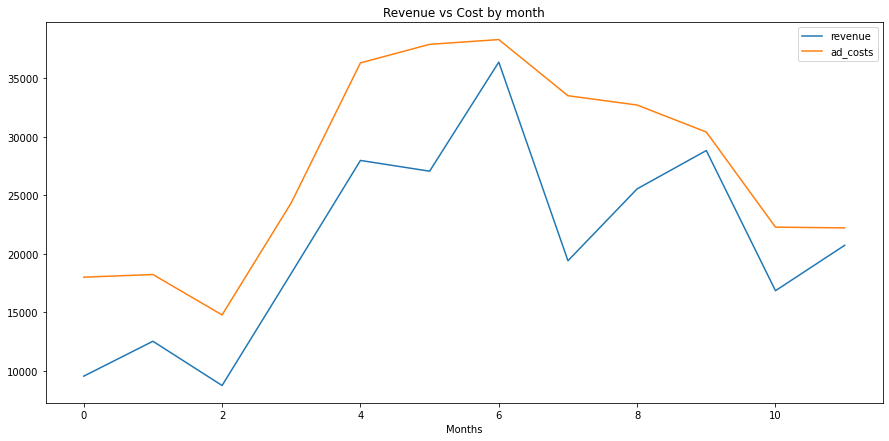

In [123]:
plt.figure(figsize=(15,7))
turnover['revenue'].plot()
turnover['ad_costs'].plot()
plt.title('Revenue vs Cost by month')
plt.xlabel('Months')
plt.legend(loc='best')
linewidth = 4
plt.show()

#### Conclusion

 - Its quiet scary to see  12 consecutive months of net losses. We spend more than we gain and its time to think if we can recoup our investment. <br>
 - Let us have a look at the costs of customer aquisition. It seems they are too expensive for us.

 - #### How much did customer acquisition from each of the sources cost?

In [124]:
costs_raw.sample()

source_id       date  ad_costs
1150          4 2017-08-01     36.22

In [125]:
visits_raw.sample()

device              end_ts  source_id            start_ts  \
184528  desktop 2017-06-13 22:46:00          1 2017-06-13 22:27:00   

                        uid  
184528  5446344156890406329

In [126]:
orders_raw.sample()

order_date  revenue                 uid
7764 2017-09-14 14:16:00     6.11  884878191268402902

In [127]:
orders_visits_merged = pd.merge(orders_raw, visits_raw, on='uid')
orders_visits_merged.sample()

order_date  revenue                  uid   device  \
634644 2018-05-13 19:35:00     4.67  2569181675832811876  desktop   

                    end_ts  source_id            start_ts  
634644 2018-01-10 15:02:00          2 2018-01-10 14:57:00

In [128]:
# number of orders per source
orders_per_source = orders_visits_merged.groupby(['source_id'])['uid'].nunique().reset_index()
orders_per_source

source_id    uid
0          1   7138
1          2   7305
2          3  13846
3          4  14253
4          5  10156
5          7      1
6          9   2793
7         10   1773

In [129]:
# we need to find number of orders per source then divide it by ad cost per source

In [130]:
# grouping by source id to calculate ad costs for each source
cac_costs = costs_raw.groupby(['source_id'])['ad_costs'].sum().reset_index()
cac_costs

source_id   ad_costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

In [131]:
# merging ad costs data with number of orders per source data
cost_by_source = pd.merge(cac_costs, orders_per_source, on='source_id', how='left')
cost_by_source

source_id   ad_costs    uid
0          1   20833.27   7138
1          2   42806.04   7305
2          3  141321.63  13846
3          4   61073.60  14253
4          5   51757.10  10156
5          9    5517.49   2793
6         10    5822.49   1773

In [132]:
# adding customer acquisition cost column 
cost_by_source['cac_per_user'] = cost_by_source['ad_costs'] / cost_by_source['uid']
cost_by_source

source_id   ad_costs    uid  cac_per_user
0          1   20833.27   7138      2.918642
1          2   42806.04   7305      5.859828
2          3  141321.63  13846     10.206676
3          4   61073.60  14253      4.284965
4          5   51757.10  10156      5.096209
5          9    5517.49   2793      1.975471
6         10    5822.49   1773      3.283976

 - Customer acquisition cost differs across source ids. Number of customers who converted to consumers also differ across source types. The highest ad cost is coming from source 3 amounted to 141,321 USD in total where we have 13,846 buyers from that source which makes our acquisition per buyer to 10.2 USD, the highest CAC among other sources.


In [133]:
# creating copy of initial dataset
source_cost = costs_raw.copy()

In [134]:
source_cost

source_id       date  ad_costs
0             1 2017-06-01     75.20
1             1 2017-06-02     62.25
2             1 2017-06-03     36.53
3             1 2017-06-04     55.00
4             1 2017-06-05     57.08
...         ...        ...       ...
2537         10 2018-05-27      9.92
2538         10 2018-05-28     21.26
2539         10 2018-05-29     11.32
2540         10 2018-05-30     33.15
2541         10 2018-05-31     17.60

[2542 rows x 3 columns]

In [135]:
# adding monthly ad cost column
source_cost['ad_month'] = source_cost['date'].astype('datetime64[M]')
source_cost_grouped =  source_cost.groupby(['ad_month','source_id']).agg({'ad_costs':'sum'})
source_cost_grouped.pivot_table(
    index='ad_month',
    columns='source_id',
    values='ad_costs',
    aggfunc='sum'
)

source_id        1        2         3        4        5       9       10
ad_month                                                                
2017-06-01  1125.61  2427.38   7731.65  3514.80  2616.12  285.22  314.22
2017-07-01  1072.88  2333.11   7674.37  3529.73  2998.14  302.54  329.82
2017-08-01   951.81  1811.05   6143.54  3217.36  2185.28  248.93  232.57
2017-09-01  1502.01  2985.66   9963.55  5192.26  3849.14  415.62  460.67
2017-10-01  2315.75  4845.00  15737.24  6420.84  5767.40  609.41  627.24
2017-11-01  2445.16  5247.68  17025.34  5388.82  6325.34  683.18  792.36
2017-12-01  2341.20  4897.80  16219.52  7680.47  5872.52  657.98  645.86
2018-01-01  2186.18  4157.74  14808.78  5832.79  5371.52  547.16  614.35
2018-02-01  2204.48  4474.34  14228.56  5711.96  5071.31  551.50  480.88
2018-03-01  1893.09  3943.14  13080.85  5961.87  4529.62  480.29  526.41
2018-04-01  1327.49  2993.70   9296.81  4408.49  3501.15  373.49  388.25
2018-05-01  1467.61  2689.44   9411.42  4214.21  3669.56  362.17  409.86

Ad costs varies across different sources on a monthly basis as well. We can observe a huge investments on ads coming from source 3.In September 2017 the ad cost on source 3 was 9963 USD and it almost doubled next month to 15737 USD in October.In general the ad costs increased from September to March each year due to seasonality. Users are mostly active during this period so there will be more ads consequently.

 - #### How worthwhile were the investments? (ROI)

In [136]:
# creating copy of costs dataset
costs_cac = costs_raw.copy()
orders_cac = orders_raw.copy()

In [137]:
orders_cac.sample()

order_date  revenue                   uid
198 2017-06-02 22:02:00     0.98  11273961602733491261

In [138]:
costs_cac.sample()

source_id       date  ad_costs
1682          5 2018-01-17    122.96

In [139]:
# creating month and year columns
costs_cac['month'] = costs_cac['date'].astype('datetime64[M]')
orders_cac['order_month'] = orders_cac['order_date'].astype('datetime64[M]')

In [140]:
# calculating the costs per month
monthly_costs = costs_cac.groupby('month').sum()

In [141]:
# converting to datetime
report['first_order_month'] = pd.to_datetime(report['first_order_month'])

In [142]:
# merging for cac and roi calculation
report_roi_final = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_roi_final['cac'] = report_roi_final['ad_costs'] / report_roi_final['n_buyers']
report_roi_final

first_order_month  n_buyers order_month   revenue  age       ltv  \
0         2017-06-01      2023  2017-06-01   9557.49    0  4.724414   
1         2017-06-01      2023  2017-07-01    981.82    1  0.485329   
2         2017-06-01      2023  2017-08-01    885.34    2  0.437637   
3         2017-06-01      2023  2017-09-01   1931.30    3  0.954671   
4         2017-06-01      2023  2017-10-01   2068.58    4  1.022531   
..               ...       ...         ...       ...  ...       ...   
73        2018-03-01      3533  2018-04-01   1063.05    1  0.300892   
74        2018-03-01      3533  2018-05-01   1114.87    2  0.315559   
75        2018-04-01      2276  2018-04-01  10600.69    0  4.657597   
76        2018-04-01      2276  2018-05-01   1209.92    1  0.531599   
77        2018-05-01      2988  2018-05-01  13925.76    0  4.660562   

    source_id  ad_costs       cac  
0        1020  18015.00  8.905091  
1        1020  18015.00  8.905091  
2        1020  18015.00  8.905091  
3        1020  18015.00  8.905091  
4        1020  18015.00  8.905091  
..        ...       ...       ...  
73       1025  30415.27  8.608907  
74       1025  30415.27  8.608907  
75        986  22289.38  9.793225  
76        986  22289.38  9.793225  
77       1054  22224.27  7.437841  

[78 rows x 9 columns]

In [143]:
# CAC (customer acquisition cost) is the cost of attracting a customer—the money a new customer costs a company.
# In healthy per-customer economics, LTV is greater than CAC.

In [144]:
# Let's calculate CAC for this cohort. We'll divide the the costs for the cohort month by the number of people:
# getting neccesary cohort
cohort_201706 = report.query('first_order_month =="2017-06"')

#calculating costs for cohort month
costs_201706 = costs_cac[costs_cac['month'] == '2017-06-01']['ad_costs'].sum()

n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706 = output.loc['2017-06'].sum()

print('CAC = ', cac_201706)
print('LTV = ', ltv_201706)

CAC =  8.905091448344043
LTV =  11.879233811171522


Well for first cohort, acquiring each customer cost the company an average of 8.90, while each customer brought in 11.87. So investment in customer acquisition is paying off.

Let's run calculations for the other cohorts and determine the number of months each cohort requires to cover marketing expenses. We'll calculate CAC for each cohort

In [145]:
# To calculate cumulative ROMI, we'll need to call the method cumsum() (cumulative sum). This adds each new element in a set.
report_roi_final['romi'] = report_roi_final['ltv'] / report_roi_final['cac']
output_roi = report_roi_final.pivot_table(
    index='first_order_month',
    columns='age',
    values='romi',
    aggfunc='mean'    
)
output_roi.cumsum(axis=1).round(2).fillna('')


age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.53  0.59  0.63  0.74  0.86  0.94  1.05  1.11  1.17  1.24   
2017-07-01         0.63  0.67  0.73  0.77  0.79  0.81  0.82  0.84  0.85  0.87   
2017-08-01         0.49  0.53  0.57  0.61  0.66  0.68   0.7  0.74  0.77  0.78   
2017-09-01         0.60  0.72  0.77  1.19  1.23   1.3  1.38   1.4  1.42         
2017-10-01         0.60  0.66  0.68   0.7  0.72  0.74  0.75  0.76               
2017-11-01         0.55   0.6  0.62  0.65  0.67  0.68  0.69                     
2017-12-01         0.54  0.57  0.68   0.8  0.84  0.87                           
2018-01-01         0.42  0.45  0.48  0.49   0.5                                 
2018-02-01         0.46  0.49   0.5  0.51                                       
2018-03-01         0.56   0.6  0.63                                             
2018-04-01         0.48  0.53                                                   
2018-05-01         0.63                                                         

age                  10    11  
first_order_month              
2017-06-01         1.31  1.33  
2017-07-01         0.88        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01

Well, return on marketing expenses differ across cohorts. For instance, September 2017 cohort paid off after 3 months while cohorts after Septermber have not yet. This implies that the average time to recoup marketing investments are longer than 3 months. Let us find out how quickly cohorts pay off on average.

In [146]:
# We'll average the values in each column and convert the table into a single string with the mean(axis=0) method: 
output_roi.cumsum(axis=1).mean(axis=0)

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

### Conclusion

On average, cohorts pay off toward the end of the 8th month.

In [147]:
# calculating 8 month average ltv since that is the period cohorts pay off 
m8_cum_ltv = output.cumsum(axis=1).mean(axis=0)[7]
print('Average LTV for 8 months from the first order:', m8_cum_ltv)

Average LTV for 8 months from the first order: 9.08358276426002


For marketing investments to pay off one customer acquisition can not cost more than $9.0835. Since our customers bring that amount of money in the 8 month period which is also the time for pay off.

<a id='3'> </a>

### Overall Conclusion

<div class="alert alert-info">The ultimate goal of our analysis was to optimize marketing expenses by calculating business metrics of Yandex.Afisha.
We were provided a datasets:<br>

<b>`Visits` --> Server logs with data on Yandex.Afisha visits from June 2017 through May 2018</b><br>
    
`uid`: user's unique identifier <br>
`device`: user's type of device<br>
`start_ts`: session start date and time<br>
`end_ts`:  session end date and time<br>
`source_id`: identifier of ad source the user came from <br>
    
<b>`Orders` --> Dump file with all orders for the period</b><br>
`uid`: unique identifier of the user making an order<br>
`buy_ts`:  order date and time<br>
`revenue`: Yandex.Afisha's revenue from the order<br>  

<b>`Costs` --> Marketing expenses statistics</b><br>
`source_id`: ad source identifier<br>
`dt`: date<br>
`costs`: expenses on this ad source on this day. <br>

Before jumping right into analysis, we had to do data preprocessing, getting the dataset cleaned and accurate. We have looked through each columns of the dataset and made decisions on preprocessing. The following changes have been made:<br>
 - All columns of our dataframes were replaced with lowercase letters
 - All columns of our datasets were changed to certain types (e.g. `device` column to category type) for the sake of optimization
 - All columns containing dates were changed to datetime formats(e.g. `start_ts` and `end_ts` columns to datetime)
 - Dataframes were checked for duplicates and missing values.

Next step which was *calculating business metrics on product* we have looked through the followings :<br>
 - Total daily/weekly/monthly active users = 908, 5,724 and 23,228 respectively; plotted a graph to see the user activity.
 - Users on average have 1 session per day.
 - Average length of sessions were not distributed normally, therefore we took the mode = 60 seconds each session's duration.
 - Retention rates were follwing the logical pattern where users' possibility to come back to app gets higher as the time passes which implies higher retention rates in earlier days comparing to later. We have looked retention rates both by cohorts and source id to see when and from which source users mostly come back. Results show that most users come from sources 1 and 2. November 2017 cohort has the highest retention rate = 2.28%  on user's 1st day meaning the next day after their registration. 

In our further step which was *calculating business metrics on sales* we have looked through the followings :<br>
 - Conversion rate that tells us when do people start buying. Conversion rates also differ across cohorts and source ids. We have calculated conversion rate by source id and cohorts to see when users buy stuff and from which source. Important nuance to mention that conversion rates are cumulative metric which means we will calculate for period inclusive all dates. For example if we look at conversion rate within a month (30 days) we take into account all users who made a purchase within this period.And the results showed us that users coming from source 1 make more purchases than any other source. June 2017, had the highest conversion rate of 16 %.
 - Number of orders across cohorts also are different. That could be explained by the seasonality of the product.November 2017 shows us that user made more orders than any other month throughout reporting peroid. There is also robust reason which is the Black Friday which takes place on the Last Friday of November each year.
 - Following orders we have calculated the average purchase size that coincides with November month showing the significant incrase in average revenue per user where they made most orders.
 - Average Life-time value of users tells us how much a user brought to the company throughout their active purchase on Yandex.Afisha. Lifetime revenue per user differs across cohorts mostly because of seasonality as we have mentioned before. Let us take examples of two cohorts with the highest revenue per user's lifetime. July 2017 which is our first cohort, on average each customer brough  11.88 USD  in revenue over their eleventh-month lifetime, whereas September 2017 cohort users brought 13.44 USD within thier eighth lifetime. It would be relatively logical the ratio of ltv and cost of customer acquisiton to see where the company stands in terms of return on marketing investment.

The next step was *calculating metrics on marketing* mainly return on marketing investment and cost of acquisition.<br>
 - We have analysed how much money was spent overall/per source/over time. Source 3 had the highest expenses where 42.9 % of our investment goes to only source 3 followed by source 4 with 18.6% of total expenses. The company had higher revenue in 2017 and consequently more investments followed in the same year. It is worth to mention that for 2018 we have data till May, so it is not comparable with 2017.
 - Customer acquistion from each source are different. It is also important to mention that we have to take into account only those visitors who converted to buyers not all visitors. Source number 3 has the highest cost of advertisement and higher CAC = 10. 2 USD comparing to other sources which their CAC lie between 2-5 USD. The CAC of source 3 almost doubles the cost of acquisition of other sources. We can see that company invests and focuses on source 3 a lot. 

Finally, Return on Marketing investment was calculated. For a company to be on a profit side, it must have its LTV greater than CAC. The results show the same pattern.  For the first cohort, acquiring each customer cost the company an average of 8.90, while each customer brought in 11.87. So investment in customer acquisition is paying off. We have  run calculations for the other cohorts and determined the number of months each cohort requires to cover marketing expenses. Well, return on marketing expenses differ across cohorts as well. For instance, September 2017 cohort paid off after 3 months while cohorts after Septermber have not yet. This implies that the average time to recoup marketing investments are longer than 3 months. Let us find out how quickly cohorts pay off on average. On average, cohorts pay off toward the end of the 8th month.

We would like to conclude that for planning advertising campaigns, we have to be careful about the sourcses in which we invest our money and it is better to diversify investment portfolios rather than placing everyting in one place. It is a must to consider that for marketing investments to pay off one customer acquisition can not cost more than $9.0835. Since our customers bring that amount of money in the 8 month period which is also the time for pay off.
   